## 1. Introduction


In [344]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Ignore FutureWarnings and AttributeErrors
warnings.filterwarnings("ignore", category=FutureWarning)

In [346]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Ignore future warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [348]:
df = pd.read_csv("flavors_of_cacao.csv")

In [204]:
df.shape

(1795, 9)

In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company 
(Maker-if known)         1795 non-null   object 
 1   Specific Bean Origin
or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review
Date                       1795 non-null   int64  
 4   Cocoa
Percent                     1795 non-null   object 
 5   Company
Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean
Type                         1794 non-null   object 
 8   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [352]:
df.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

In [366]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
REF,1795.0,1035.904735,552.886365,5.0,576.000,1069.00,1502.0,1952.0
Review\nDate,1795.0,2012.325348,2.927210,2006.0,2010.000,2013.00,2015.0,2017.0
Rating,1795.0,3.185933,0.478062,1.0,2.875,3.25,3.5,5.0


In [362]:
df.describe(include="O").T

,count,unique,top,freq
Company \n(Maker-if known),1795,416,Soma,47
Specific Bean Origin\nor Bar Name,1795,1039,Madagascar,57
Cocoa\nPercent,1795,45,70%,672
Company\nLocation,1795,60,U.S.A.,764
Bean\nType,1794,41,,887
Broad Bean\nOrigin,1794,100,Venezuela,214


In [368]:
df.isna().sum()

Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
dtype: int64

In [370]:
df.dtypes

Company \n(Maker-if known)            object
Specific Bean Origin\nor Bar Name     object
REF                                    int64
Review\nDate                           int64
Cocoa\nPercent                        object
Company\nLocation                     object
Rating                               float64
Bean\nType                            object
Broad Bean\nOrigin                    object
dtype: object

## Cleaning the dataset

In [372]:
# Change the column names
df.columns = ['CompanyName','BeanOrigin','REF','ReviewDate','CocoaPercent','Location','Rating','BeanType','BroadOrigin']
df

,CompanyName,BeanOrigin,REF,ReviewDate,CocoaPercent,Location,Rating,BeanType,BroadOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [374]:
# fill the null value
df['BeanType'] = df['BeanType'].fillna('unknown')

In [378]:
# Remove '%' sign and convert to float, then divide by 100
df['CocoaPercent'] = df['CocoaPercent'].str.rstrip('%').astype('float') / 100

AttributeError: Can only use .str accessor with string values!

In [380]:
df['CocoaPercent']

0       0.63
1       0.70
2       0.70
3       0.70
4       0.70
        ... 
1790    0.70
1791    0.65
1792    0.65
1793    0.62
1794    0.65
Name: CocoaPercent, Length: 1795, dtype: float64

## Exploratory Data Analysis

<Axes: ylabel='Location'>

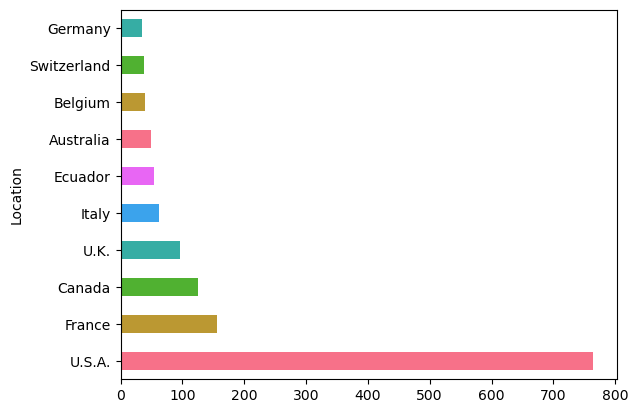

In [274]:
df['Location'].value_counts().head(10).plot.barh(color=colors)

<Axes: xlabel='CocoaPercent'>

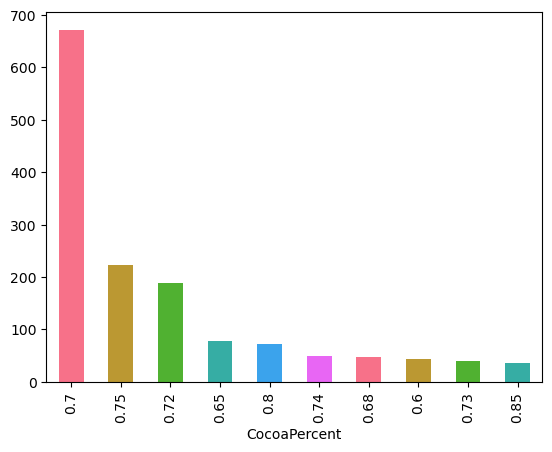

In [282]:
df['CocoaPercent'].value_counts().head(10).plot.bar(color=colors)

<Axes: ylabel='Rating'>

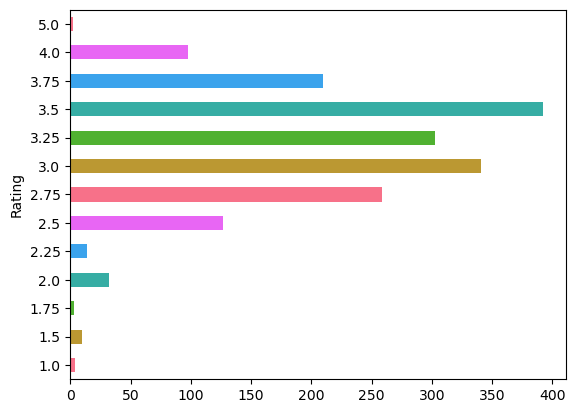

In [280]:
df['Rating'].value_counts().sort_index().plot.barh(color=colors)

In [320]:
df[df['Rating'] == 5.0]

,CompanyName,BeanOrigin,REF,ReviewDate,CocoaPercent,Location,Rating,BeanType,BroadOrigin
78,Amedei,Chuao,111,2007,0.7,Italy,5.0,Trinitario,Venezuela
86,Amedei,Toscano Black,40,2006,0.7,Italy,5.0,Blend,


<Axes: ylabel='BeanOrigin'>

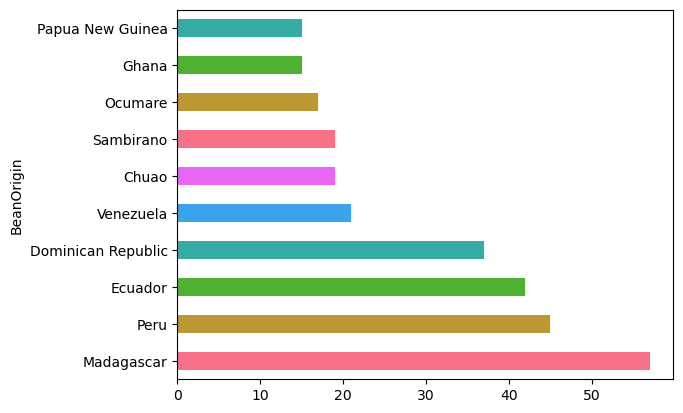

In [262]:
df['BeanOrigin'].value_counts().head(10).plot.barh(color=colors)

## Analysis of Variance


### Is there a significant difference in cocoa percent for USA, France, Canada, UK and Italy?
Null Hypothesis (H0): The mean cocoa percentage of the five countries is equal.

Alternative Hypothesis (H1): The mean cocoa percentage of the five countries is not equal.

In [308]:
import pandas as pd
from scipy import stats
# Define our alpha significance level
alpha = 0.01

# Filter ratings by location
USA = df[df['Location'] == 'U.S.A.']['CocoaPercent']
France = df[df['Location'] == 'France']['CocoaPercent']
Canada = df[df['Location'] == 'Canada']['CocoaPercent']
UK = df[df['Location'] == 'U.K.']['CocoaPercent']
Italy = df[df['Location'] == 'Italy']['CocoaPercent']

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(USA, France, Canada, UK, Italy)

# Print the results
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 5.51878926732552
P-value: 0.00021052990449764203


In [288]:
conclusion = 'significant' if p_value < alpha else 'not significant'

print(f'''
The difference between the different groups was {conclusion} for a significance
level of {alpha}.
''')


The difference between the different groups was significant for a significance
level of 0.01.



### We need to conduct post-hoc tests for multiple comparisons to find out which groups are different


#### KDE plot with each country's distribution comparison of cocoa percentages. 

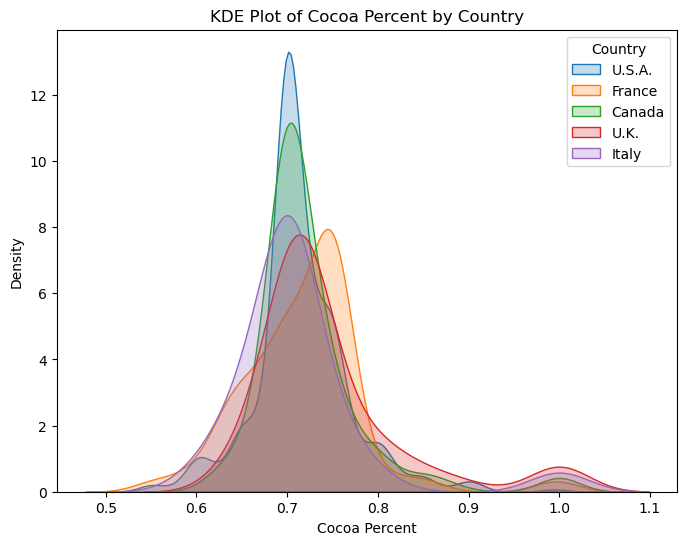

In [328]:
# List of countries to plot
countries = ['U.S.A.', 'France', 'Canada', 'U.K.', 'Italy']

# Create a figure and axes
plt.figure(figsize=(8, 6))

# Plot each country in the same plot
for country in countries:
    sns.kdeplot(data=df[df['Location'] == country], x='CocoaPercent', fill=True, label=country)

# Add labels and title
plt.xlabel('Cocoa Percent')
plt.ylabel('Density')
plt.title('KDE Plot of Cocoa Percent by Country')
plt.legend(title='Country')

# Display the plot
plt.show()